In [1]:
import sys
import os
from pathlib import Path
import importlib
import pandas as pd
import pandas_market_calendars as mcal
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import logging
from pathlib import Path
import io

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%H:%M:%S"
)

logger = logging.getLogger(__name__)

# Get the project root directory (parent of notebooks/)
project_root = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()


# Add src directory to Python path
sys.path.insert(0, str(project_root / 'src'))

# Import and reload to pick up any code changes
try:
    from classes.data import cleaner as cleaner_module
except ImportError:
    # First time import
    import classes.data.cleaner as cleaner_module
else:
    # Module already imported, reload it
    importlib.reload(cleaner_module)

from classes.data.cleaner import DataCleaner

-----

# Cleaning and pickling all files inside the raw folders

Dividends data is sent directly to cleaned folder. Moreover, as input daily data has different shape and file type, it must be handled before entering the loop.

In [7]:
import pandas as pd
from pathlib import Path

path = Path(r"C:\Users\giuli\Repositories\intraday-momentum\data\raw\SPY_daily_from27-10-2023.txt")

# Read input file (daily format)
df = pd.read_csv(path)

# Convert Date + Time into a proper datetime column
df["caldt"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%m/%d/%Y %H:%M")

# Rename columns to match the desired schema
df = df.rename(columns={
    "Vol": "volume",
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
})

# Select the correct columns in the desired order
df = df[["volume", "open", "high", "low", "close", "caldt"]]

# Save as CSV next to the original file
csv_path = path.with_suffix(".csv")
df.to_csv(csv_path, index=False)

print(f"Saved cleaned CSV to: {csv_path}")


Saved cleaned CSV to: C:\Users\giuli\Repositories\intraday-momentum\data\raw\SPY_daily_from27-10-2023.csv


17:39:34 - INFO - ==========================================================================================
17:39:34 - INFO - Processing file: SPY_1min_20231027_20251027.csv
17:39:34 - INFO - ==========================================================================================
17:39:34 - INFO - First 5 rows (before cleaning):
     volume     open    high      low    close                caldt
0  630285.0  413.560  413.94  413.530  413.770  2023-10-30 09:30:00
1  322290.0  413.780  414.01  413.750  413.882  2023-10-30 09:31:00
2  455364.0  413.910  414.21  413.845  414.140  2023-10-30 09:32:00
3  269190.0  414.130  414.24  414.050  414.205  2023-10-30 09:33:00
4  330914.0  414.205  414.32  414.205  414.270  2023-10-30 09:34:00
17:39:34 - INFO - Missing Ratios After Indexing:
17:39:34 - INFO - volume    0.0
open      0.0
high      0.0
low       0.0
close     0.0
17:39:34 - INFO - First 5 rows (after cleaning):
                       volume     open    high      low    close
Datetim

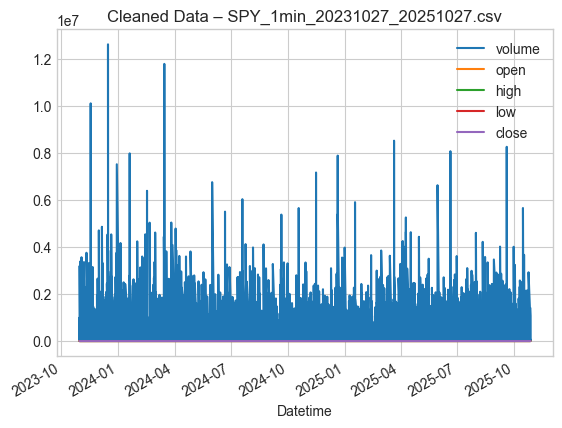

17:39:35 - INFO - Columns in DataFrame:
Index(['volume', 'open', 'high', 'low', 'close'], dtype='object')
17:39:35 - INFO - Plotting of DataFrame:

c:\Users\giuli\Repositories\intraday-momentum\src\classes\data\cleaner.py:222: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend(loc='lower left')


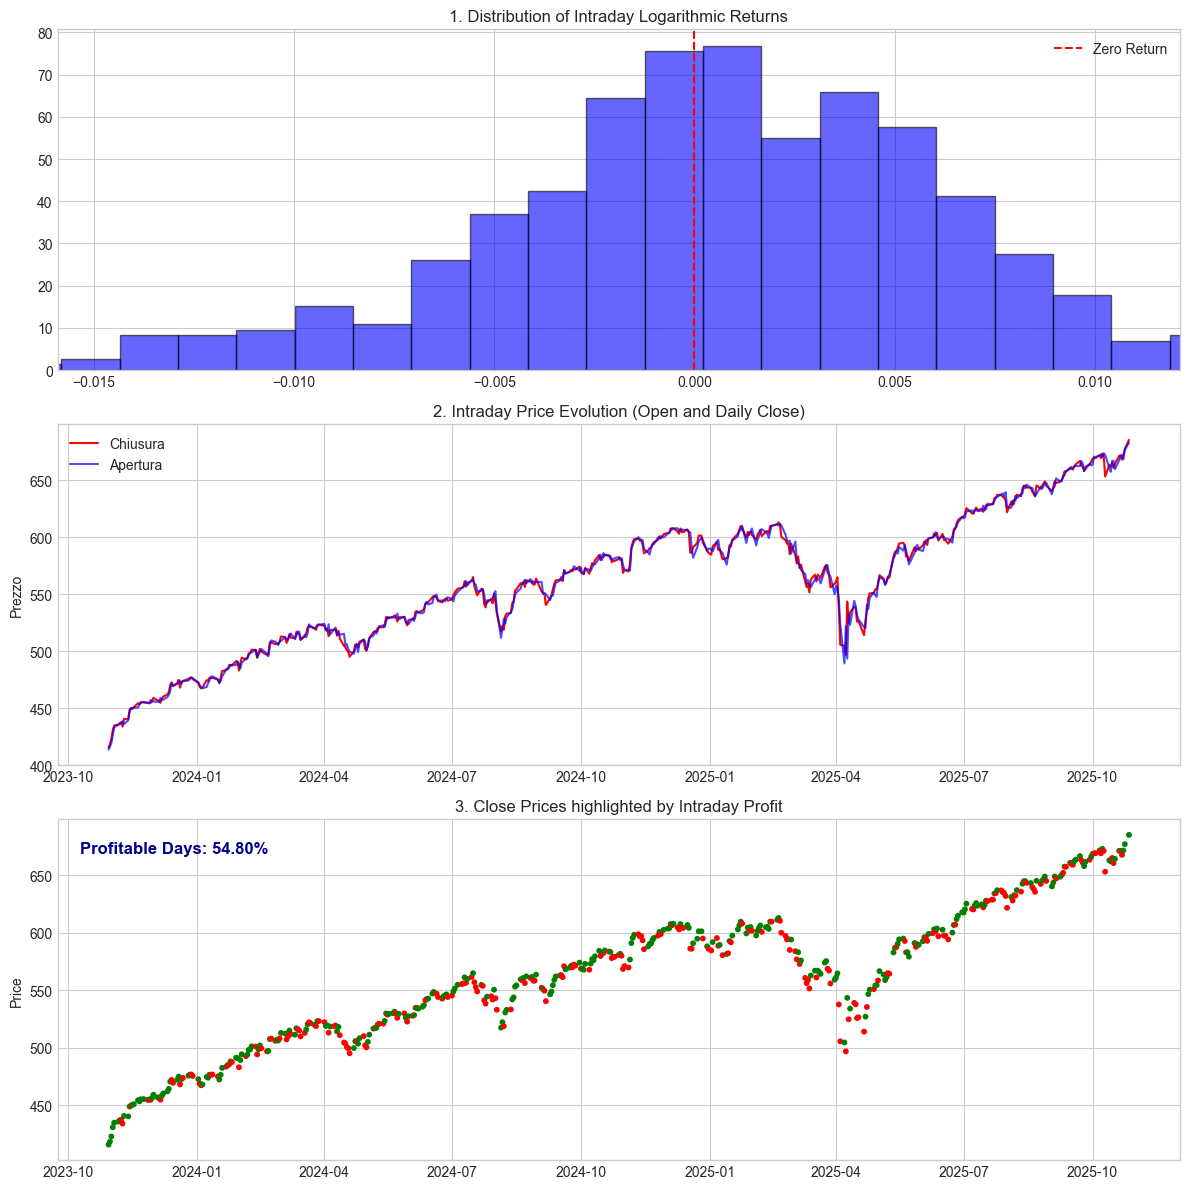

17:39:36 - INFO - Object successfully pickled and saved to: C:\Users\giuli\Repositories\intraday-momentum\data\cleaned\SPY_1min_20231027_20251027.pkl
17:39:36 - INFO - Saved cleaned file as: SPY_1min_20231027_20251027_cleaned.csv
17:39:36 - INFO - ==========================================================================================

17:39:36 - INFO - ==========================================================================================
17:39:36 - INFO - Processing file: SPY_daily_from27-10-2023.csv
17:39:36 - INFO - ==========================================================================================
17:39:36 - INFO - First 5 rows (before cleaning):
      volume    open    high     low   close                caldt
0  107368271  414.19  414.60  409.21  410.68  2023-10-27 16:00:00
1   86568775  413.56  416.68  412.22  415.59  2023-10-30 16:00:00
2   79665172  416.18  418.53  414.21  418.20  2023-10-31 16:00:00
3   98068196  419.20  423.50  418.65  422.66  2023-11-01 16:00:0

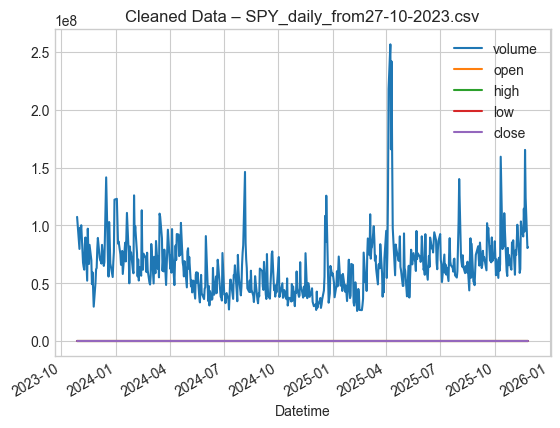

17:39:36 - INFO - Columns in DataFrame:
Index(['volume', 'open', 'high', 'low', 'close'], dtype='object')
17:39:36 - INFO - Plotting of DataFrame:

c:\Users\giuli\Repositories\intraday-momentum\src\classes\data\cleaner.py:222: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend(loc='lower left')


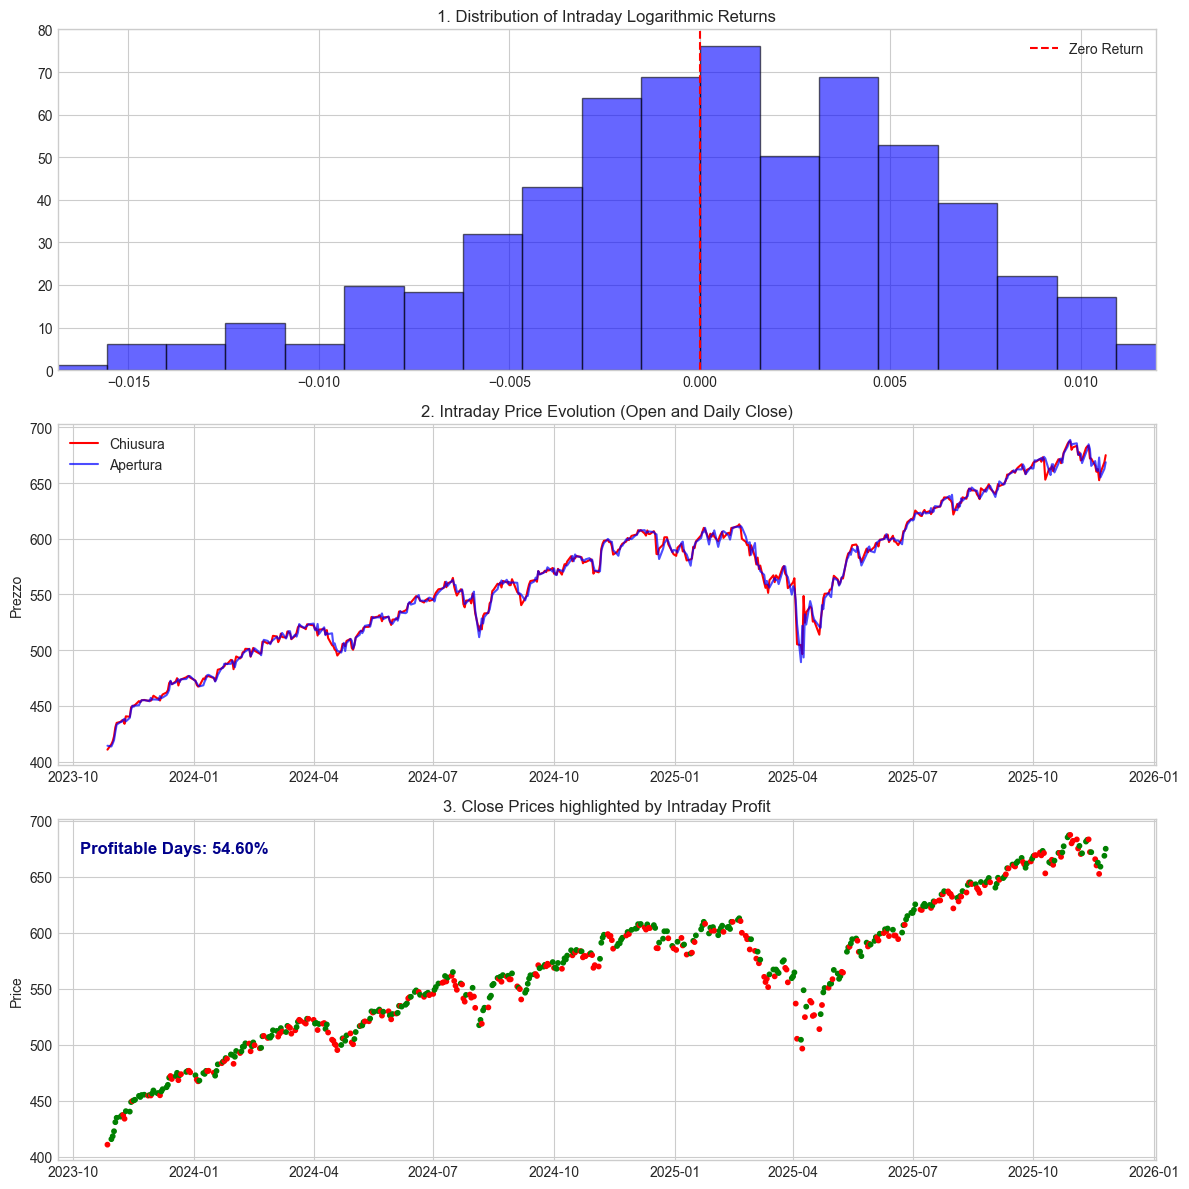

17:39:37 - INFO - Object successfully pickled and saved to: C:\Users\giuli\Repositories\intraday-momentum\data\cleaned\SPY_daily_from27-10-2023.pkl
17:39:37 - INFO - Saved cleaned file as: SPY_daily_from27-10-2023_cleaned.csv
17:39:37 - INFO - ==========================================================================================

17:39:37 - INFO - ==========================================================================================
17:39:37 - INFO - Processing file: ^VIX_1day_20231027_20251027.csv
17:39:37 - INFO - ==========================================================================================
17:39:37 - INFO - First 5 rows (before cleaning):
   volume       open       high        low      close  \
0       0  20.389999  22.070000  19.719999  21.270000   
1       0  21.129999  21.160000  19.549999  19.750000   
2       0  19.860001  19.860001  17.969999  18.139999   
3       0  18.020000  18.420000  16.629999  16.870001   
4       0  16.590000  16.620001  15.580000  

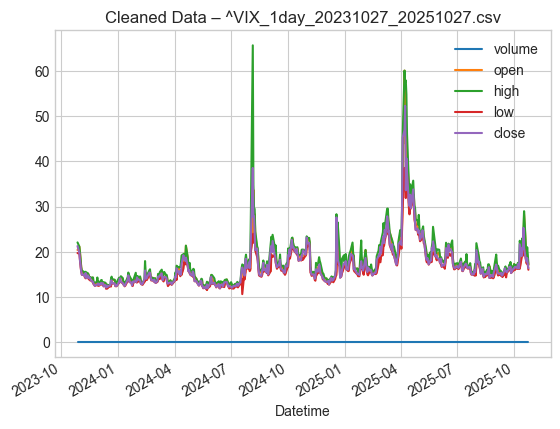

17:39:37 - INFO - Columns in DataFrame:
Index(['volume', 'open', 'high', 'low', 'close'], dtype='object')
17:39:37 - INFO - Plotting of DataFrame:

c:\Users\giuli\Repositories\intraday-momentum\src\classes\data\cleaner.py:222: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend(loc='lower left')


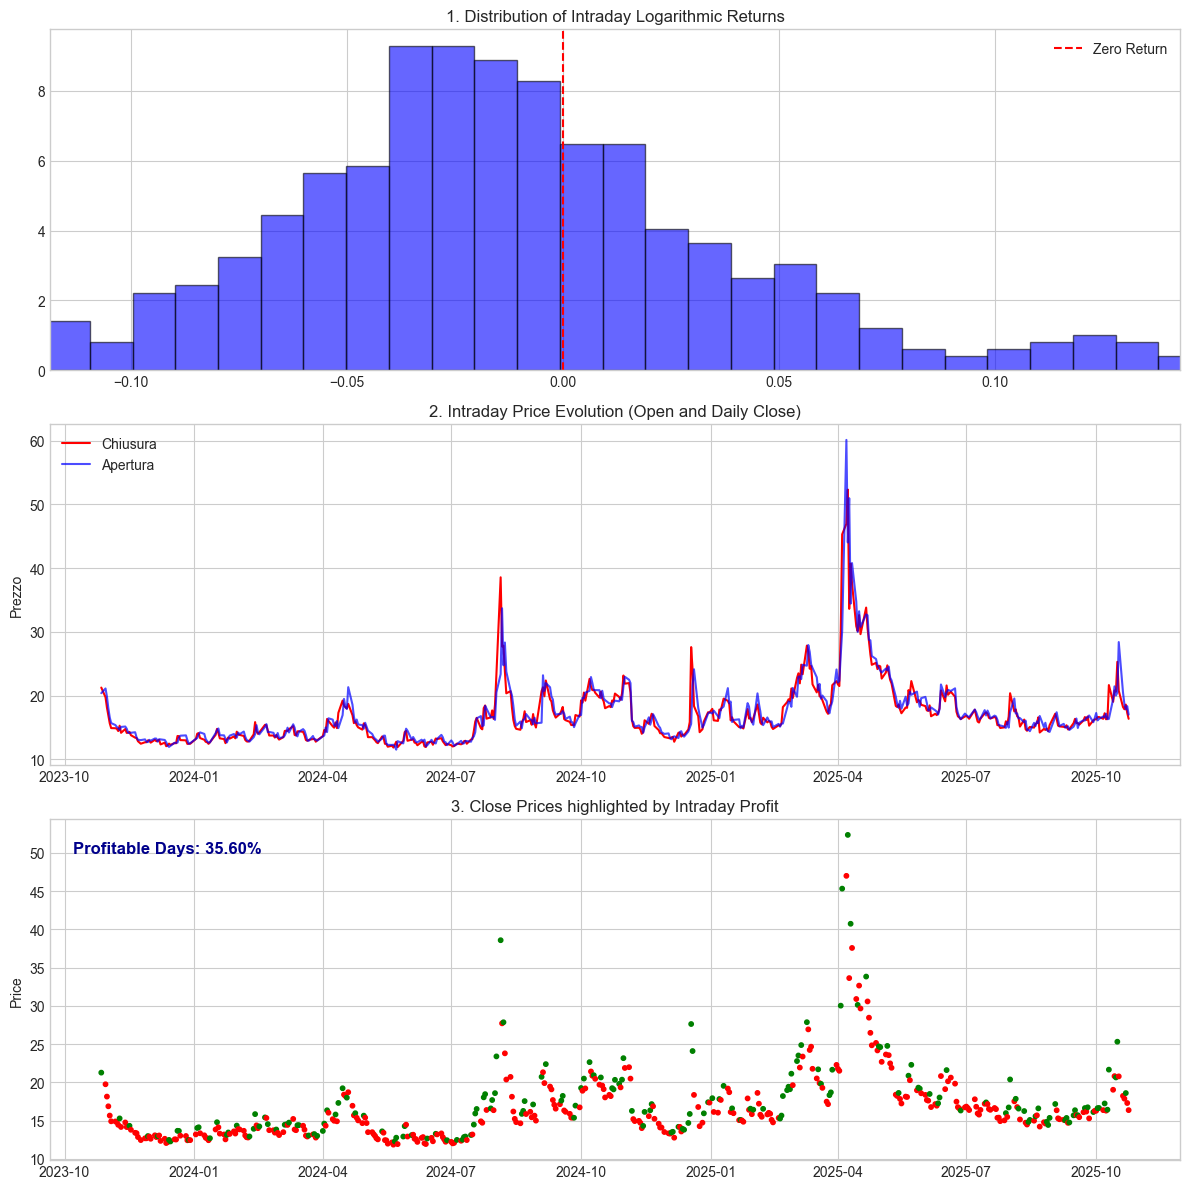

17:39:38 - INFO - Object successfully pickled and saved to: C:\Users\giuli\Repositories\intraday-momentum\data\cleaned\^VIX_1day_20231027_20251027.pkl
17:39:38 - INFO - Saved cleaned file as: ^VIX_1day_20231027_20251027_cleaned.csv
17:39:38 - INFO - ==========================================================================================



In [12]:
# Directory containing raw data files
raw_data_dir = project_root / "data" / "raw"

# Iterate over all CSV files in the raw directory
for file_path in raw_data_dir.glob("*.csv"):
    
    separator = "=" * 90
    logger.info(separator)
    logger.info(f"Processing file: {file_path.name}")
    logger.info(separator)

    # Initialize the cleaning object
    cleaner = DataCleaner(file_path)

    # Preview the first rows BEFORE cleaning
    logger.info("First 5 rows (before cleaning):\n%s", cleaner.df.iloc[:5, :])

    # Perform cleaning
    cleaner.clean()

    # Preview the first rows AFTER cleaning
    logger.info("First 5 rows (after cleaning):\n%s", cleaner.df.iloc[:5, :])

    # Print dataframe info
    buf = io.StringIO()
    cleaner.df.info(buf=buf)
    logger.info(buf.getvalue())


    # Plot the cleaned series
    logger.info("Plotting cleaned data...")
    cleaner.df.plot()
    plt.title(f"Cleaned Data – {file_path.name}")
    plt.show()

    # Display available columns
    logger.info("Columns in DataFrame:\n%s", cleaner.df.columns)
    
    # Display some plotting
    logger.info("Plotting of DataFrame:\n")
    cleaner.plot()    

    # Save cleaned output (remove .csv from filename)
    output_name = file_path.stem
    cleaner.save_cleaned(output_name)

    logger.info(f"Saved cleaned file as: {output_name}_cleaned.csv")
    logger.info(separator + "\n")


-----